In [95]:
# Importando bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier 
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import MinMaxScaler

import warnings
warnings.filterwarnings('ignore')

In [96]:
# Ler dados do DataSet
csv_dir = "/content/sample_data/csgo_round_snapshots.csv"
data = pd.read_csv(csv_dir, delimiter=",")

In [97]:
data.head()

,time_left,ct_score,t_score,map,bomb_planted,ct_health,t_health,ct_armor,t_armor,ct_money,...,t_grenade_flashbang,ct_grenade_smokegrenade,t_grenade_smokegrenade,ct_grenade_incendiarygrenade,t_grenade_incendiarygrenade,ct_grenade_molotovgrenade,t_grenade_molotovgrenade,ct_grenade_decoygrenade,t_grenade_decoygrenade,round_winner
0,175.00,0.0,0.0,de_dust2,False,500.0,500.0,0.0,0.0,4000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CT
1,156.03,0.0,0.0,de_dust2,False,500.0,500.0,400.0,300.0,600.0,...,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,CT
2,96.03,0.0,0.0,de_dust2,False,391.0,400.0,294.0,200.0,750.0,...,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,CT
3,76.03,0.0,0.0,de_dust2,False,391.0,400.0,294.0,200.0,750.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CT
4,174.97,1.0,0.0,de_dust2,False,500.0,500.0,192.0,0.0,18350.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CT


In [98]:
data.shape

(119666, 97)

In [99]:
data.describe()

,time_left,ct_score,t_score,ct_health,t_health,ct_armor,t_armor,ct_money,t_money,ct_helmets,...,ct_grenade_flashbang,t_grenade_flashbang,ct_grenade_smokegrenade,t_grenade_smokegrenade,ct_grenade_incendiarygrenade,t_grenade_incendiarygrenade,ct_grenade_molotovgrenade,t_grenade_molotovgrenade,ct_grenade_decoygrenade,t_grenade_decoygrenade
count,119666.000000,119666.000000,119666.000000,119666.000000,119666.000000,119666.000000,119666.000000,119666.000000,119666.000000,119666.00000,...,119666.000000,119666.000000,119666.000000,119666.000000,119666.000000,119666.000000,119666.000000,119666.000000,119666.000000,119666.000000
mean,97.774984,6.705372,6.791988,412.102159,402.733583,314.326893,298.497476,9832.895726,11260.701870,2.05731,...,1.856099,1.858431,1.544231,1.628031,1.005089,0.019730,0.047516,1.352272,0.027017,0.025153
std,54.429067,4.796654,4.826339,132.299432,139.865608,170.992376,174.612033,11256.023516,12187.904582,1.84210,...,1.773777,1.794355,1.738026,1.829289,1.460464,0.143507,0.226329,1.663319,0.167108,0.162458
min,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,54.920000,3.000000,3.000000,351.000000,322.000000,194.000000,174.000000,1300.000000,1600.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,94.910000,6.000000,6.000000,500.000000,500.000000,378.000000,334.000000,5550.000000,7150.000000,2.00000,...,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,166.910000,10.000000,10.000000,500.000000,500.000000,486.000000,468.000000,14650.000000,18050.000000,4.00000,...,3.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000,2.000000,0.000000,0.000000
max,175.000000,32.000000,33.000000,500.000000,600.000000,500.000000,500.000000,80000.000000,80000.000000,5.00000,...,7.000000,7.000000,6.000000,9.000000,5.000000,3.000000,3.000000,5.000000,3.000000,2.000000


In [100]:
# Pegar informações para ver se são dados númericos ou precisa ser tratado e se tem nulos
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119666 entries, 0 to 119665
Data columns (total 97 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   time_left                     119666 non-null  float64
 1   ct_score                      119666 non-null  float64
 2   t_score                       119666 non-null  float64
 3   map                           119666 non-null  object 
 4   bomb_planted                  119666 non-null  bool   
 5   ct_health                     119666 non-null  float64
 6   t_health                      119666 non-null  float64
 7   ct_armor                      119666 non-null  float64
 8   t_armor                       119666 non-null  float64
 9   ct_money                      119666 non-null  float64
 10  t_money                       119666 non-null  float64
 11  ct_helmets                    119666 non-null  float64
 12  t_helmets                     119666 non-nul

In [101]:
data.nunique()

time_left                    10704
ct_score                        33
t_score                         34
map                              8
bomb_planted                     2
                             ...  
ct_grenade_molotovgrenade        4
t_grenade_molotovgrenade         6
ct_grenade_decoygrenade          4
t_grenade_decoygrenade           3
round_winner                     2
Length: 97, dtype: int64

In [102]:
data['round_winner'].nunique()

2

In [103]:
data['bomb_planted'] = data['bomb_planted'].astype(np.int16)

In [104]:
encoder = LabelEncoder()

data['map'] = encoder.fit_transform(data['map'])

In [105]:
data['round_winner'] = encoder.fit_transform(data['round_winner'])

In [106]:
data['round_winner'].nunique()

2

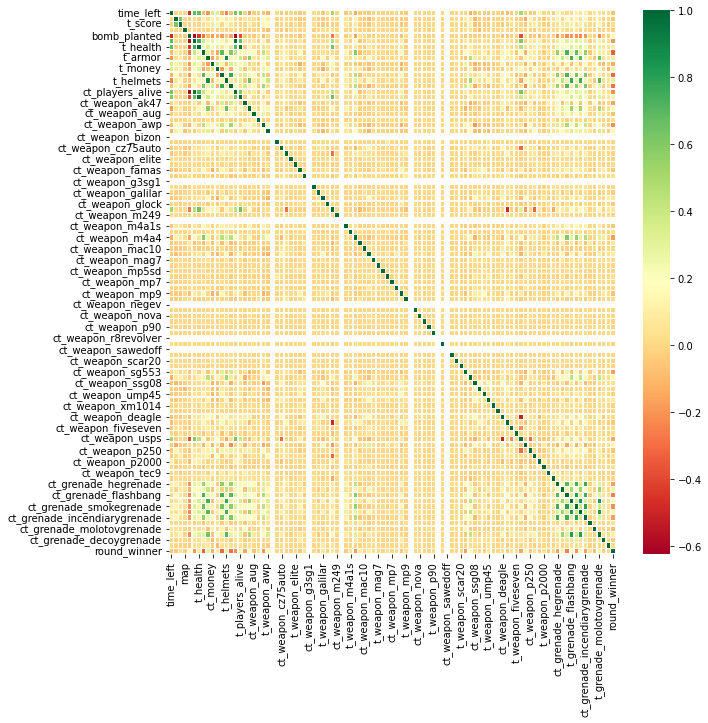

In [107]:
# Correlação
corr = pd.DataFrame(data).corr()
plt.figure(figsize = (10, 10))
sns.heatmap(corr, cmap ='RdYlGn', linewidths = 0.30)

In [108]:
y = data['round_winner']
X = data.drop('round_winner', axis=1)

In [109]:
data_columns = X.columns
data_columns

Index(['time_left', 'ct_score', 't_score', 'map', 'bomb_planted', 'ct_health',
       't_health', 'ct_armor', 't_armor', 'ct_money', 't_money', 'ct_helmets',
       't_helmets', 'ct_defuse_kits', 'ct_players_alive', 't_players_alive',
       'ct_weapon_ak47', 't_weapon_ak47', 'ct_weapon_aug', 't_weapon_aug',
       'ct_weapon_awp', 't_weapon_awp', 'ct_weapon_bizon', 't_weapon_bizon',
       'ct_weapon_cz75auto', 't_weapon_cz75auto', 'ct_weapon_elite',
       't_weapon_elite', 'ct_weapon_famas', 't_weapon_famas',
       'ct_weapon_g3sg1', 't_weapon_g3sg1', 'ct_weapon_galilar',
       't_weapon_galilar', 'ct_weapon_glock', 't_weapon_glock',
       'ct_weapon_m249', 't_weapon_m249', 'ct_weapon_m4a1s', 't_weapon_m4a1s',
       'ct_weapon_m4a4', 't_weapon_m4a4', 'ct_weapon_mac10', 't_weapon_mac10',
       'ct_weapon_mag7', 't_weapon_mag7', 'ct_weapon_mp5sd', 't_weapon_mp5sd',
       'ct_weapon_mp7', 't_weapon_mp7', 'ct_weapon_mp9', 't_weapon_mp9',
       'ct_weapon_negev', 't_weapon_negev',

In [110]:
normalizador = MinMaxScaler()
normalizador.fit(X)
data_normalize = normalizador.transform(X)

In [111]:
data_normalize

array([[1.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.89159381, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.54871707, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [1.        , 0.28125   , 0.18181818, ..., 0.        , 0.        ,
        0.        ],
       [1.        , 0.28125   , 0.18181818, ..., 0.        , 0.        ,
        0.        ],
       [1.        , 0.28125   , 0.18181818, ..., 0.        , 0.        ,
        0.        ]])

In [112]:
X.describe()

,time_left,ct_score,t_score,map,bomb_planted,ct_health,t_health,ct_armor,t_armor,ct_money,...,ct_grenade_flashbang,t_grenade_flashbang,ct_grenade_smokegrenade,t_grenade_smokegrenade,ct_grenade_incendiarygrenade,t_grenade_incendiarygrenade,ct_grenade_molotovgrenade,t_grenade_molotovgrenade,ct_grenade_decoygrenade,t_grenade_decoygrenade
count,119666.000000,119666.000000,119666.000000,119666.000000,119666.000000,119666.000000,119666.000000,119666.000000,119666.000000,119666.000000,...,119666.000000,119666.000000,119666.000000,119666.000000,119666.000000,119666.000000,119666.000000,119666.000000,119666.000000,119666.000000
mean,97.774984,6.705372,6.791988,3.522128,0.111803,412.102159,402.733583,314.326893,298.497476,9832.895726,...,1.856099,1.858431,1.544231,1.628031,1.005089,0.019730,0.047516,1.352272,0.027017,0.025153
std,54.429067,4.796654,4.826339,1.935931,0.315125,132.299432,139.865608,170.992376,174.612033,11256.023516,...,1.773777,1.794355,1.738026,1.829289,1.460464,0.143507,0.226329,1.663319,0.167108,0.162458
min,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,54.920000,3.000000,3.000000,2.000000,0.000000,351.000000,322.000000,194.000000,174.000000,1300.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,94.910000,6.000000,6.000000,3.000000,0.000000,500.000000,500.000000,378.000000,334.000000,5550.000000,...,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,166.910000,10.000000,10.000000,5.000000,0.000000,500.000000,500.000000,486.000000,468.000000,14650.000000,...,3.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000,2.000000,0.000000,0.000000
max,175.000000,32.000000,33.000000,7.000000,1.000000,500.000000,600.000000,500.000000,500.000000,80000.000000,...,7.000000,7.000000,6.000000,9.000000,5.000000,3.000000,3.000000,5.000000,3.000000,2.000000


In [113]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119666 entries, 0 to 119665
Data columns (total 96 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   time_left                     119666 non-null  float64
 1   ct_score                      119666 non-null  float64
 2   t_score                       119666 non-null  float64
 3   map                           119666 non-null  int64  
 4   bomb_planted                  119666 non-null  int16  
 5   ct_health                     119666 non-null  float64
 6   t_health                      119666 non-null  float64
 7   ct_armor                      119666 non-null  float64
 8   t_armor                       119666 non-null  float64
 9   ct_money                      119666 non-null  float64
 10  t_money                       119666 non-null  float64
 11  ct_helmets                    119666 non-null  float64
 12  t_helmets                     119666 non-nul

In [114]:
X = pd.DataFrame(data=data_normalize, columns=data_columns)

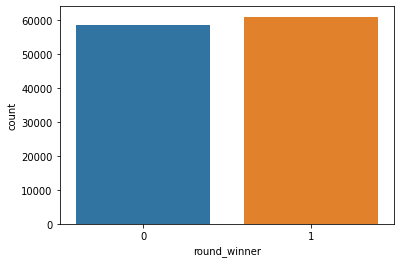

In [115]:
sns.countplot(y)

In [116]:
k_score = list()

for i in range(1, 11):
  rforest = RandomForestClassifier(max_features=i, criterion='gini', random_state=0)
  scores = cross_val_score(rforest, X, y, cv=10)
  k_score.append(scores.mean())

Text(0, 0.5, 'Cross-Validated-Accuracy')

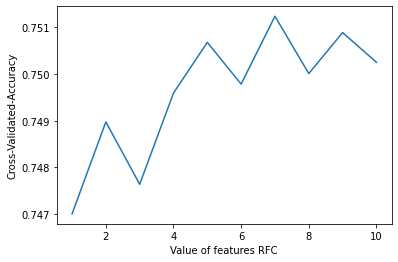

In [117]:
%matplotlib inline
plt.plot(range(1, 11), k_score)
plt.xlabel('Value of features RFC')
plt.ylabel('Cross-Validated-Accuracy')

In [118]:
k_scores = list()
for k in range(1, 25):
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
    k_scores.append(scores.mean())

Text(0, 0.5, 'Cross-Validated-Accuracy')

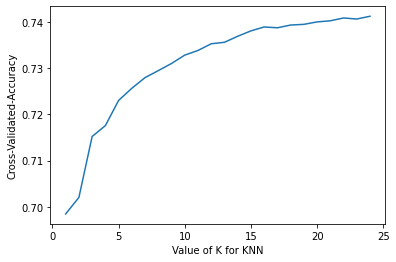

In [119]:
%matplotlib inline
plt.plot(range(1, 25), k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated-Accuracy')